# Desafio 3 - Grupo 3

 -------------- Insertar AQUI descripcion de desafio -----------

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import re
pd.set_option('display.float_format', lambda x: '%.2f' % x)


## DESCRIPCIÓN DE VARIABLES
A continuación se detallan las variables incluidas en la base con una breve descripción de las mismas.

- ID_DATOS_ABIERTOS_LEGAJO Código identificador del legajo al que pertenece la persona afectada
- ID_DATOS_ABIERTOS_PERSONA Código identificador de la persona afectada
- AÑO Año en el que fue realizada la presentación
- MES Mes en el que fue realizada la presentación
- INGRESO Indica por quién o a través de qué institución fue derivada a la OVD
- LEG_TERCERA Identifica si el legajo al que pertenece la persona afectada fue iniciado por una tercera persona
- SEXO_GENERO Indica el sexo/género de la persona afectada
- GRUPO_EDAD Indica el grupo de edad de la persona afectada
- EDAD Edad de la persona afectada
- NACIONALIDAD Nacionalidad de la persona afectada
- DOMICILIO_PROVINCIA Provincia en la que se domicilia la persona afectada
- BARRIO Barrio en el que se domicilia la persona afectada
- COMUNA Comuna en la que se domicilia la persona afectada
- LOCALIDAD_OTRAS_PROVINCIAS Detalle de localidad extra jurisdiccional en la que se domicilia la persona afectada
- NIVEL_INSTRUCCION Nivel de instrucción de la persona afectada
- CONDICIÓN_LABORAL Condición laboral de la persona afectada
- CATEGORIA_OCUPACIONAL Categoría ocupacional de la persona afectada -sólo para personas ocupadas
- CATEGORIA_OCUPACIONAL_DETALLE Detalle de la categoría ocupacional de la persona afectada
- RELACION_AFECTADA_DENUNCIADA Vínculo entre la persona afectada y la persona denunciada
- COHABITAN Indica si la persona afectada y la denunciada cohabitan o cohabitaban hasta una semana previa a la denuncia
- FRECUENCIA_EPISODIOS Indica la frecuencia de los episodios de violencia
- V_FISICA Indica si se registró violencia física en la presentación
- V_PSIC Indica si se registró violencia psicológica en la presentación
- V_ECON Indica si se registró violencia económico patrimonial en la presentación
- V_SEX Indica si se registró violencia sexual en la presentación
- V_SOC Indica si se registró violencia social en la presentación
- V_AMB Indica si se registró violencia ambiental en la presentación
- V_SIMB Indica si se registró violencia simbólica en la presentación 
- EVA_RIESGO Indica la evaluación de riesgo efectuada por los equipos interdisciplinarios de la OVD
- DENUNCIADA_SEXO_GENERO Indica el sexo/género de la persona denunciada
- DENUNCIADA_EDAD Indica el grupo de edad de la persona denunciada
- DENUNCIADA_COND_LAB Indica la condición laboral de la persona denunciada
- DENUNCIADA_NIVEL_INSTRU Indica el nivel de instrucción de la persona denunciada
- JNCIVIL Indica si en dicho legajo hubo derivación a la Justicia Nacional en lo Civil
- JPENAL Indica si en dicho legajo hubo derivación a la Justicia Penal
- ASJURIDICO Indica si en dicho legajo hubo derivación a Asesoramiento Jurídico
- SISTSALUD Indica si en dicho legajo hubo derivación al sistema de salud
- DGM Indica si en dicho legajo hubo derivación a la Dirección General de la
- Mujer (C.A.B.A.)
- CDNNYA Indica si en dicho legajo hubo derivación al Consejo de Derechos de
- Niñas, Niños y Adolescentes (C.A.B.A.)
- INSTNOJUDICIAL Indica si en dicho legajo hubo derivación a instancia no judicial
- JUSPROV Indica si en dicho legajo hubo derivación a la Justicia Provincial
- PROTEGER Indica si en dicho legajo hubo derivación al Programa Proteger (C.A.B.A.)
- SZYPDN Indica si en dicho legajo hubo derivación al Servicio Zonal de Promoción y Protección Integral de los derechos de los niños
- DGMREFUGIO Indica si en dicho legajo hubo derivación a la Dirección General de la Mujer – Refugio- (C.A.B.A.)
- ROVD Indica si dicho legajo se reservó en la OVD
- DPMENEINCAP Indica si en dicho legajo hubo derivación a la Defensoría Pública de Menores e Incapaces de la Nación.


<font color="blue">Queremos predecir el valor de EVA_RIESGO en funcion de los valores de las otras features </font>

In [2]:
column_names =  [
    "ID_DATOS_ABIERTOS_LEGAJO","ID_DATOS_ABIERTOS_PERSONA",
    "ANO",
    "MES",
    "INGRESO",
    "LEG_TERCERA",
    "SEXO_GENERO",
    "GRUPO_EDAD",
    "EDAD",
    "NACIONALIDAD",
    "DOMICILIO_PROVINCIA",
    "BARRIO",
    "COMUNA",
    "LOCALIDAD_OTRAS_PROVINCIAS",
    "NIVEL_INSTRU",
    "CONDICION_LABORAL",
    "CATEGORIA_OCUPACIONAL",
    "CATEGORIA_OCUPACIONAL_DETALLE",
    "RELACION_AFECTADA_DENUNCIADA",
    "COHABITAN",
    "FRECUENCIA_EPISODIOS",
    "V_FISICA","V_PSIC","V_ECON","V_SEX","V_SOC","V_AMB","V_SIMB",
    "EVA_RIESGO",
    "DENUNCIADA_SEXO_GENERO",
    "DENUNCIADA_EDAD",
    "DENUNCIADA_COND_LAB",
    "DENUNCIADA_NIVEL_INSTRU",
    "JNCIVIL",
    "JPENAL",
    "ASJURIDICO",
    "SISTSALUD",
    "DGM",
    "CONDNNYA",
    "INSTNOJUDICIAL",
    "JUSPROV",
    "PROTEGER",
    "SZYPDN",
    "DGMREFUGIO",
    "ROVD",
    "DPMENEINCAP"]
df = pd.read_csv('ovddatosabiertos2018-1.csv',sep=';',names=column_names,skiprows=1,encoding = "ISO-8859-1")
df.shape

(15374, 46)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15374 entries, 0 to 15373
Data columns (total 46 columns):
ID_DATOS_ABIERTOS_LEGAJO         15374 non-null object
ID_DATOS_ABIERTOS_PERSONA        15374 non-null object
ANO                              15374 non-null float64
MES                              15374 non-null object
INGRESO                          15374 non-null object
LEG_TERCERA                      15374 non-null object
SEXO_GENERO                      15374 non-null object
GRUPO_EDAD                       15374 non-null object
EDAD                             15374 non-null object
NACIONALIDAD                     15368 non-null object
DOMICILIO_PROVINCIA              14857 non-null object
BARRIO                           13968 non-null object
COMUNA                           13961 non-null object
LOCALIDAD_OTRAS_PROVINCIAS       889 non-null object
NIVEL_INSTRU                     15293 non-null object
CONDICION_LABORAL                15318 non-null object
CATEGORIA_OC

In [4]:
#elegimos con que features vamos a trabajar
features_columns=[
    #"ID_DATOS_ABIERTOS_LEGAJO","ID_DATOS_ABIERTOS_PERSONA","ANO","MES",
    "INGRESO",
    "LEG_TERCERA",
    "SEXO_GENERO",
    "GRUPO_EDAD",
   # "EDAD",
    "NACIONALIDAD",
    "DOMICILIO_PROVINCIA",
   # "BARRIO",
   # "COMUNA",
   # "LOCALIDAD_OTRAS_PROVINCIAS",
    "NIVEL_INSTRU",
    "CONDICION_LABORAL",
    "CATEGORIA_OCUPACIONAL",
   # "CATEGORIA_OCUPACIONAL_DETALLE",
    "RELACION_AFECTADA_DENUNCIADA",
    "COHABITAN",
    "FRECUENCIA_EPISODIOS",
    "V_FISICA","V_PSIC","V_ECON","V_SEX","V_SOC","V_AMB","V_SIMB",
  ##  "EVA_RIESGO",
    "DENUNCIADA_SEXO_GENERO",
    "DENUNCIADA_EDAD",
    "DENUNCIADA_COND_LAB",
    "DENUNCIADA_NIVEL_INSTRU",
  #  "JNCIVIL","JPENAL","ASJURIDICO","SISTSALUD","DGM","CONDNNYA","INSTNOJUDICIAL","JUSPROV",
  #  "PROTEGER","SZYPDN","DGMREFUGIO","ROVD","DPMENEINCAP"
]

# limpiamos la base de nulos

In [5]:
def nulos(serie):
    return df.loc[df[serie] == '#¡NULO!']

In [6]:
for col in df.columns:
    print(nulos(col).shape)

(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(57, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)
(0, 46)


/home/santiago/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


## Analizamos la variable target

In [7]:
set(df["EVA_RIESGO"])

{'ALTISIMO', 'ALTO', 'BAJO', 'MEDIO', 'MODERADO', nan}

Tiene algo de informacion basura asique la tiramos y volvemos a ver las opciones

In [8]:
df.drop(df.loc[df["EVA_RIESGO"].isna()].index,inplace=True)
df.shape

(15368, 46)

In [9]:
set(df["EVA_RIESGO"])

{'ALTISIMO', 'ALTO', 'BAJO', 'MEDIO', 'MODERADO'}

## en principio vamos  ahacer la prueba con la evaluacion de riesgo "alta" y "altisima"

In [10]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

X=pd.get_dummies(df[features_columns],drop_first=1)
y=((df["EVA_RIESGO"]=="ALTO") | (df["EVA_RIESGO"]=="ALTISIMO")).astype("int")
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=df['EVA_RIESGO'])

def scoreByModel(model,X_train,X_test,y_train,y_test):
    print("Score Train : %.4f " %  model.score(X_train, y_train))
    print("Score Test : %.4f " %  model.score(X_test, y_test))

In [11]:
#X.shape
set(df["EVA_RIESGO"])

{'ALTISIMO', 'ALTO', 'BAJO', 'MEDIO', 'MODERADO'}

In [12]:
X.shape

(15368, 133)

# hacemos una matriz de correlacion

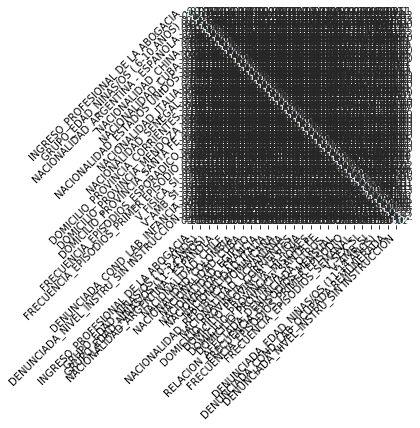

In [32]:
def matrix_cor(X):
    mat=X.corr()
    fig, ax = plt.subplots()
    sns.heatmap(mat, square=True, annot=True, fmt='.2f', cbar=False,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))
    ax.set_ylim(len(mat)+0.5,-0.5,-0.5,-0.5);
    ax.set_xticklabels(ax.get_xticklabels(),    rotation=45,    horizontalalignment='right');
    ax.set_yticklabels(ax.get_yticklabels(),    rotation=45,    horizontalalignment='right');
matrix_cor(X)

Es bastante dificil de analizar porque son muchas features

# hagamos un poco de feature selection

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=50, step = 1)
_ = selector.fit(X_train, y_train)

scores = pd.DataFrame()
scores["Attribute Name"] = X.columns
scores["Ranking"] = selector.ranking_
scores["Support"] = selector.support_

print(scores)

X=X.loc[:,selector.support_]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=df['EVA_RIESGO'])


                                        Attribute Name  Ranking  Support
0    INGRESO_CONSEJO DE DERECHOS DE  NIÑAS/OS Y ADO...       56    False
1                INGRESO_DIRECCION GENERAL DE LA MUJER       47    False
2                                      INGRESO_DIRECTA       22    False
3                         INGRESO_FUERZAS DE SEGURIDAD       48    False
4                                     INGRESO_JUSTICIA       49    False
5                                    INGRESO_LINEA 144       20    False
6                                        INGRESO_OTROS       42    False
7                   INGRESO_PROFESIONAL DE LA ABOGACIA        1     True
8      INGRESO_PROGRAMA VICTIMAS CONTRA LAS VIOLENCIAS        1     True
9                INGRESO_REFERENCIAS DE OTRAS PERSONAS       23    False
10                            INGRESO_SISTEMA DE SALUD       69    False
11                                      LEG_TERCERA_SI       55    False
12                                   SEXO_GENERO_VA

# volvemos a hacer matriz de correlacion

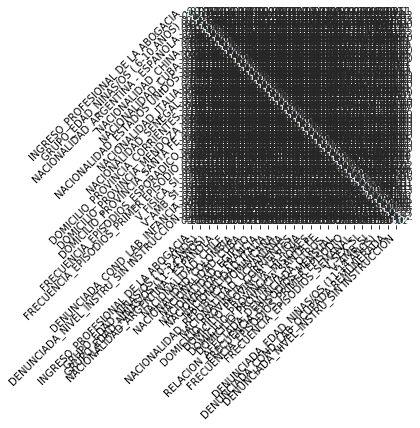

In [33]:
matrix_cor(X)

siguen siendo muchas features, buscaremos otras formas de trabajarlas

# Probemos KNN

In [15]:
from sklearn.model_selection import KFold

def scores_knn(X,y,start,stop,step):
    
    # Voy a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto voy a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    # Lista de Diccionarios
    
    scores_para_df = []
    
    # range(1,40,5) son los posibles valores de n_neighbors que quiero explorar. Son todos los enteros desde el 1
    # hasta el 40 en saltos de a 5. (Start,Stop,Step)
    
    for i in range(start,stop,step):
        # En cada iteración instanciamos el modelo con un hiperparámetro distinto
        
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
        
        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
        
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardo cada uno en la lista de diccionarios
        
        scores_para_df.append(dict_row_score)
        
    df_scores = pd.DataFrame(scores_para_df)
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    return df_scores

In [16]:
# SON TODAS DUMMIES NO HACE FALTA ESCALAR 
# PERO PROBEMOS!
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Descubramos los hiperparametros
df_scores= scores_knn(X_train, y_train, 10, 11, 1)


In [17]:
df_scores

,n_neighbours,score_medio,score_std,limite_inferior,limite_superior
0,10,0.70,0.01,0.69,0.71


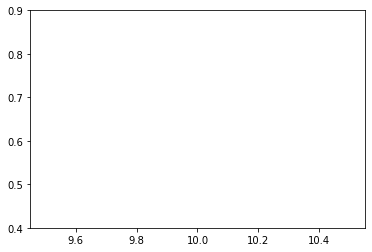

In [18]:
plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r')
plt.ylim(0.4, .9);

In [19]:
best_k = df_scores.loc[df_scores.score_medio ==\
                               df_scores.score_medio.max(),'n_neighbours'].values
best_k = best_k[0]
best_k


# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [20]:
scoreByModel(model,X_train,X_test,y_train,y_test)

Score Train : 0.7250 
Score Test : 0.6892 


In [21]:
y_pred = model.predict(X_test)

array([[2313,  506],
       [ 927,  865]])

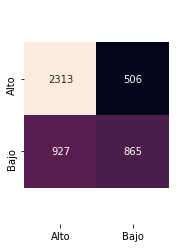

In [22]:
mat=confusion_matrix(y_test, y_pred)
display(mat)

fig, ax = plt.subplots()
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Alto","Bajo"], yticklabels=["Alto","Bajo"])
ax.set_ylim(2+0.5,-0.5,-0.5,-0.5);


In [23]:
# Computamos el accuracy score:
accuracy_score(y_test, y_pred)

0.6892214270223379

In [24]:
y.mean()

0.38866475793857364

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      2819
           1       0.63      0.48      0.55      1792

    accuracy                           0.69      4611
   macro avg       0.67      0.65      0.66      4611
weighted avg       0.68      0.69      0.68      4611



# Probamos con Gaussian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

modelGaussianNB = GaussianNB()
modelGaussianNB.fit(X_train, y_train);
scoreByModel(modelGaussianNB,X_train,X_test,y_train,y_test)

Score Train : 0.5842 
Score Test : 0.5875 


array([[1101, 1718],
       [ 184, 1608]])

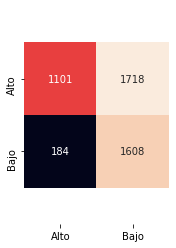

In [27]:
y_pred = modelGaussianNB.predict(X_test)
mat=confusion_matrix(y_test, y_pred)
display(mat)

fig, ax = plt.subplots()
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Alto","Bajo"], yticklabels=["Alto","Bajo"])
ax.set_ylim(2+0.5,-0.5,-0.5,-0.5);


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.39      0.54      2819
           1       0.48      0.90      0.63      1792

    accuracy                           0.59      4611
   macro avg       0.67      0.64      0.58      4611
weighted avg       0.71      0.59      0.57      4611



# Probamos con Multinomial Naive Bayes

In [29]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB

# TODO TOFIX Acá se puede jugar con los hiperparametros
modelMultinomialNB = MultinomialNB(alpha=1.0e-10)
modelMultinomialNB.fit(X_train, y_train);
scoreByModel(modelMultinomialNB,X_train,X_test,y_train,y_test)



Score Train : 0.6990 
Score Test : 0.7033 


array([[2456,  363],
       [1005,  787]])

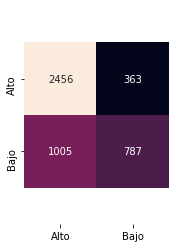

In [30]:
y_pred = modelMultinomialNB.predict(X_test)
mat=confusion_matrix(y_test, y_pred)
display(mat)

fig, ax = plt.subplots()
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Alto","Bajo"], yticklabels=["Alto","Bajo"])
ax.set_ylim(2+0.5,-0.5,-0.5,-0.5);


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78      2819
           1       0.68      0.44      0.54      1792

    accuracy                           0.70      4611
   macro avg       0.70      0.66      0.66      4611
weighted avg       0.70      0.70      0.69      4611

